C:\Users\tacom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tacom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tacom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tacom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

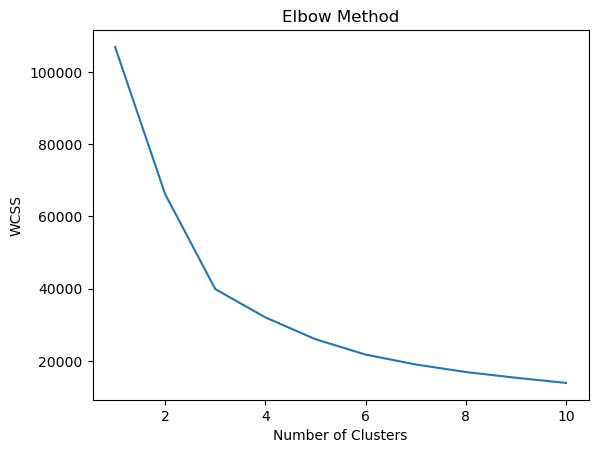

C:\Users\tacom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


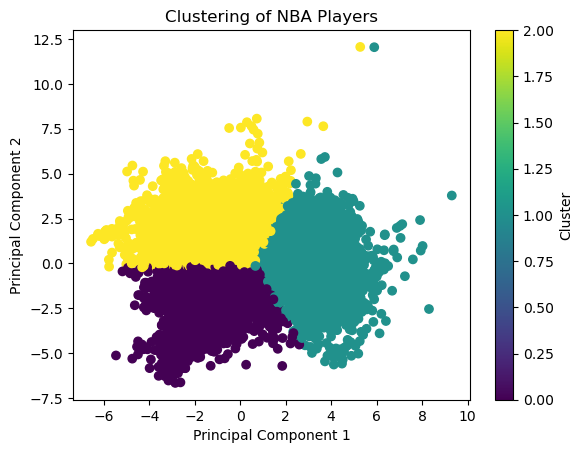

               age  player_height  player_weight         gp        pts  \
Cluster                                                                  
0        27.293943     193.772598      91.814077  61.058412  12.015343   
1        26.713248     196.585092      94.962736  33.246973   4.189346   
2        27.398038     206.914480     109.283453  53.343066   7.296145   

              reb       ast  net_rating  oreb_pct  dreb_pct  ...  \
Cluster                                                      ...   
0        3.298896  3.359166   -0.273432  0.026211  0.105726  ...   
1        1.886717  1.085714   -5.336838  0.042525  0.116049  ...   
2        4.597787  1.012272   -2.036040  0.082425  0.178446  ...   

         season_2013-14  season_2014-15  season_2015-16  season_2016-17  \
Cluster                                                                   
0              0.036070        0.036878        0.037685        0.038223   
1              0.035282        0.037703        0.031131        

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the NBA player dataset
nba_data = pd.read_csv('all_seasons.csv')

# Drop irrelevant columns
nba_data = nba_data.drop(['Unnamed: 0', 'player_name'], axis=1)

# Handling missing values (if any)
nba_data = nba_data.dropna()

# Convert categorical variables to numerical using one-hot encoding
nba_data_encoded = pd.get_dummies(nba_data, columns=['team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'season'])

# Normalize the numerical features
scaler = StandardScaler()
nba_data_scaled = scaler.fit_transform(nba_data_encoded)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
nba_data_pca = pca.fit_transform(nba_data_scaled)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(nba_data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method, choose the optimal number of clusters
n_clusters = 3

# Apply k-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(nba_data_pca)

# Visualize the clusters
plt.scatter(nba_data_pca[:, 0], nba_data_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering of NBA Players')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Analyze the clusters
nba_data_encoded['Cluster'] = clusters
cluster_stats = nba_data_encoded.groupby('Cluster').mean()
print(cluster_stats)

